# Tarea 2: Programación Intermedia
## Parte II
<p style = 'text-align: right;'> Andrés Chacón Escalante - C32026 </p>
<p style = 'text-align: right;'> Marco Barquero Hernández - C30970 </p>

Las siguientes librerías son las utilizadas en el código:

In [1]:
import math
import numpy as np
import copy
import matplotlib.pyplot as plt

Primero se define el método de RK4, de igual forma al presentado en $quantum.ipynb$ del material de $Semana\_05$. En este se obtienen aproximaciones de los valores de $y_{n+1}$ para un cambio de $h$ de $x$, para esto se necesita de; $function$, la sección no diferencial de la ecuación diferencial lineal a aproximar; $x_n$, el valor de $x$ anterior al punto a calcular; $y_n$, el anterior valor de la función; $h$ el tamaño de paso entre $x_n$ y $x_{n+1}$. El método se programa como:

In [2]:
def rk4(function, x_n, y_n, h):
    k1 = function(x_n,y_n)
    k2 = function(x_n + h/2, y_n + h/2*k1)
    k3 = function(x_n + h/2, y_n + h/2*k2)
    k4 = function(x_n + h, y_n + h*k3)
    return y_n + h/6*(k1+2*k2+2*k3+k4)

En este caso, la función ecuación a trabajar es:
\begin{equation}
\frac{dy}{dx}=2(1-y)-e^{-4x}
\end{equation}
Por lo que de define una función con toda la sección no diferencial, necesario para el RK4:

In [3]:
def function(x,y):
    function_val = 2*(1-y)-math.exp(-4*x)
    return function_val

El métodos se utilizará para valores con $x \in [0,2]$, y se van a tomar 2500 puntos equidistantes. El "paso" entre cada punto ($x_n$ y $x_{n+1}$) se define como $h$.

In [4]:
xValues = np.linspace(0.0, 2.0, 2500)
h = xValues[1] - xValues[0]

Se prepara un $array$ de ceros con el tamaño de $xValues$ para almacenar los datos de $y$ obtenidos con el RK4.

In [5]:
yValues = np.zeros(xValues.size)

Se definen los valores iniciales para $y$ y $x$ como 1 y 0, respectivamente, por la indicación de condiciones iniciales $y(0)=1$.
Además de estos se realiza una copia con el cual se inicia el proceso del RK4:

In [6]:
y_init = 1
y_n = copy.deepcopy(y_init)

x_init = 0
x_n = copy.deepcopy(x_init)

Se itera a través de todos los valores a evaluar de $x$ con el métodos RK4, después de cada cálculo se guarda en un nuevo valor $y_{n+1}$ (en $y_{nn}$) y se aumenta $x_n$ en $h$ para obtener el valor de $x_{n+1}$ de la siguiente iteración.

In [7]:
for step in range(xValues.size):
    yValues[step] = y_n #safe value of y_n
    y_nn = rk4(function,x_n,y_n,h) #prediction of y_(n+1) by RK4
    x_n = x_n + h #increment of x in h for next step
    y_n = copy.copy(y_nn) #reassingment of y for next step

Por último, los datos aproximados obtenidos por RK4 para el rango, se grafica, y de tal forma, se presenta su comportamiento.

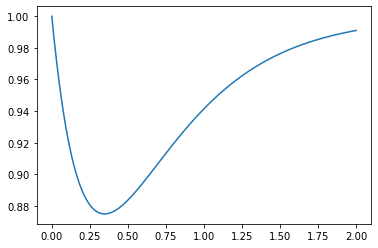

In [8]:
plt.plot(xValues,yValues);

Este es, entonces, el comportamiento de $y$ para $x \in [0,2]$ con condiciones iniciales $y(0)=1$ predicho con RK4.